# CSC311 Project: sklearn decision tree


In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library

In addition to using `numpy` for its linear algebra functionalities, we will also use
a library called `pandas` to help us read CSV files and manipulate tabular data.
The below code reads each of the csv files into a **data frame**, which is a way that
`pandas` stores tabular data.
As an added bonus, Jupyter notebooks display these data frames in a human-readable way.

In [2]:
import pandas as pd

As before, we will start by downloading the data to Google Colab.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving final_final_fr_fr.csv to final_final_fr_fr.csv


Use pandas to read the dataset.

NOTE: make sure to use flag **keep_default_na=False** when reading to keep 'None' as None instead of automatically converted to NaN

In [4]:
# ensure None values kept only in q8 column, but switched to NaN in others
na_values = ["None", "", "NA", "N/A", "null"]

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/final_final_fr_fr.csv', na_values=na_values, keep_default_na=True)
# data = pd.read_csv('/content/cleaned_data.csv', na_values=na_values, keep_default_na=True)
data['Q8: How much hot sauce would you add to this food item?'] = data['Q8: How much hot sauce would you add to this food item?'].fillna("None")
data['Q4: How much would you expect to pay for one serving of this food item?'] = pd.to_numeric(data['Q4: How much would you expect to pay for one serving of this food item?'], errors='coerce')

# Display the first few rows of the DataFrame
data.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coke,Friends,A little (mild),Pizza
1,715742,4,2,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coke,"Friends,Teachers,Strangers",none,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10.0,action movie,coke,Friends,A moderate amount (medium),Pizza
3,606874,4,6,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,soda,"Siblings,Friends",A little (mild),Pizza


## Part 1. Data:

In [5]:
data['Q2: How many ingredients would you expect this food item to contain?'] = pd.to_numeric(data['Q2: How many ingredients would you expect this food item to contain?'], errors='coerce')
data.describe()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q4: How much would you expect to pay for one serving of this food item?
count,1644.000000,1644.000000,1632.000000,1638.000000
mean,581970.958029,3.174574,5.991422,11.558107
std,125479.145414,1.021050,2.935844,7.728217
min,5978.000000,1.000000,1.000000,1.000000
25%,524483.750000,2.000000,4.000000,6.970000
50%,617502.000000,3.000000,5.000000,10.000000
75%,631686.250000,4.000000,7.000000,15.000000
max,854745.000000,5.000000,25.000000,100.000000


In [6]:
# make a copy of data as data_fets
data_fets = data.copy()

# one-hot vectoring q3, q5, q6, q7
# rename the columns for easier use
data_fets = data_fets.rename(columns={
    'Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)': 'Q1',
    'Q2: How many ingredients would you expect this food item to contain?': 'Q2',
    'Q3: In what setting would you expect this food to be served? Please check all that apply': 'Q3',
    'Q4: How much would you expect to pay for one serving of this food item?': 'Q4',
    'Q5: What movie do you think of when thinking of this food item?': 'Q5',
    'Q6: What drink would you pair with this food item?': 'Q6',
    'Q7: When you think about this food item, who does it remind you of?': 'Q7',
    'Q8: How much hot sauce would you add to this food item?': 'Q8'
})

# Columns that need to be one-hot encoded
cols_to_expand = ["Q3", "Q5", "Q6", "Q7"]
features = ['Q1', 'Q2', 'Q4', 'Q8']

for col in cols_to_expand:
    # Ensure missing values are treated as empty strings
    data_fets[col] = data_fets[col].fillna('')

    # Use str.get_dummies() to create one-hot encoded columns
    dummies = data_fets[col].str.get_dummies(sep=',')

    # Rename columns for clarity
    dummies = dummies.add_prefix(f"{col}_")

    # add column name to features
    features.extend(dummies.columns.tolist())

    # Drop the original column and concatenate the new features
    data_fets = data_fets.drop(columns=[col]).join(dummies)

# scaling q8
# create mapping
mapping = {
    'none': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 1}

# convert str values in q8 to ints using mapping
data_fets['Q8'] = data_fets['Q8'].map(mapping)

# remove id and label column
data_fets.drop(columns=['id'], inplace=True)
data_fets.drop(columns=['Label'], inplace=True)

# Display the transformed DataFrame
data_fets.head()

,Q1,Q2,Q4,Q8,Q3_At a party,Q3_Late night snack,Q3_Week day dinner,Q3_Week day lunch,Q3_Weekend dinner,Q3_Weekend lunch,...,Q6_the avengers,Q6_water,Q6_yakult,Q6_yogurt,Q7_Friends,Q7_Parents,Q7_Siblings,Q7_Strangers,Q7_Teachers,Q7_none
0,3,6.0,5.0,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,2.0,5.0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,3,5.0,10.0,2,0,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,4,6.0,3.0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,1,0
4,2,3.0,5.0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


We will also declare a new array to store all the feature names. This will come in handy later when we visualize decision trees.

In [7]:
# sort features list
# features.sort(key=lambda x: (x.split("_")[0], x))

print(features)

['Q1', 'Q2', 'Q4', 'Q8', 'Q3_At a party', 'Q3_Late night snack', 'Q3_Week day dinner', 'Q3_Week day lunch', 'Q3_Weekend dinner', 'Q3_Weekend lunch', 'Q5_1001 nights', 'Q5_11sep', 'Q5_13 hours', 'Q5_2012', 'Q5_21 jump street', 'Q5_3 idiots', 'Q5_30 minutes or less', 'Q5_47 ronin', 'Q5_7 samurai', 'Q5_9', 'Q5_a goofy movie the disney movie', 'Q5_a quiet place 2', 'Q5_a quiet place day one 2024', 'Q5_a silent voice', 'Q5_a silent voice 2016', 'Q5_action movie', 'Q5_air bud', 'Q5_aladdin', 'Q5_aladdin idk', 'Q5_alien', 'Q5_alitathe warrior', 'Q5_all sort of american young boy movies', 'Q5_alladin', 'Q5_american pie', 'Q5_anchorman', 'Q5_angry birds', 'Q5_anime', 'Q5_anime i guess', 'Q5_anime movie', 'Q5_anjaana anjaani', 'Q5_any american movie', 'Q5_any bollywood movie', 'Q5_any kind really probably something more relaxed for leisure', 'Q5_any movie set in new york', 'Q5_aquaman', 'Q5_arcane', 'Q5_argo', 'Q5_babylon', 'Q5_back in action', 'Q5_back to the future', 'Q5_back to the future 2',

**Task** Finally, let's separate our data into training, validation, and test sets.
We will use 5000 data points for training, 1500 for validation, and 1500 for test.

Instead of manually splitting the data into two sets, we will use a function provided by `sklearn` which randomly splits the data for us. Use the `train_test_split` function to split the data into training and test sets. To ensure that the randomization is consistent across runs, please supply the following parameter to the `train_test_split` function: 'random_state=1'.  This will ensure that the each time you run your code, you are placing the same data points in your training, test and validation sets.

You will likely need to read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for the `sklearn.model_selection.train_test_splits` to get this job done.

## Part 2. Using `sklearn` to Implement and Visualize Decision Trees

One advantage of decision trees over other models is that they are easy
to interpret and visualize.  The function `visualize_tree` below can be used to plot an `sklearn` decision tree model in your Colab Notebook.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into X (dependent variables) and t (response variable)
X = data_fets
t = np.array(data["Label"])


X_tv, X_test, t_tv, t_test = train_test_split(X, t, test_size=0.2, random_state=42)
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, train_size=0.75, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
import pydotplus
from IPython.display import display

In [10]:
def visualize_forest(model, num_trees_to_show=5, max_depth=5):
    """
    Generate and return an image representing an Sklearn decision tree.

    Each node in the visualization represents a node in the decision tree.
    In addition, visualization for each node contains:
        - The feature that is split on
        - The entropy (of the outputs `t`) at the node
        - The number of training samples at the node
        - The number of training samples with true/false values
        - The majority class (heart disease or not)
    The colour of the node also shows the majority class and purity

    See here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

    Parameters:
        `model` - An Sklearn decision tree model
        `max_depth` - Max depth of decision tree to be rendered in the notebook.
         This is useful since the tree can get very large if the max_depth is
         set too high and thus making the resulting figure difficult to interpret.
    """
    num_trees = len(model.estimators_)
    print(f"Forest contains {num_trees} trees. Showing {min(num_trees_to_show, num_trees)} trees.")

    for i in range(min(num_trees_to_show, num_trees)):
        tree = model.estimators_[i]
        print(f"\nTree #{i+1}:")
        dot_data = treeViz.export_graphviz(tree,
                                          feature_names=features,
                                          max_depth=max_depth,
                                          class_names=["Pizza", "Shawarma", "Sushi"],
                                          filled=True,
                                          rounded=True)
        display(graphviz.Source(dot_data))


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, t_train)

# Predict on training and testing data
t_train_pred = clf.predict(X_train)
t_test_pred = clf.predict(X_valid)

# Calculate accuracy
train_accuracy = accuracy_score(t_train, t_train_pred)
valid_accuracy = accuracy_score(t_valid, t_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Valid Accuracy: {valid_accuracy:.2f}")



Training Accuracy: 1.00
Valid Accuracy: 0.88


Forest contains 100 trees. Showing 3 trees.

Tree #1:


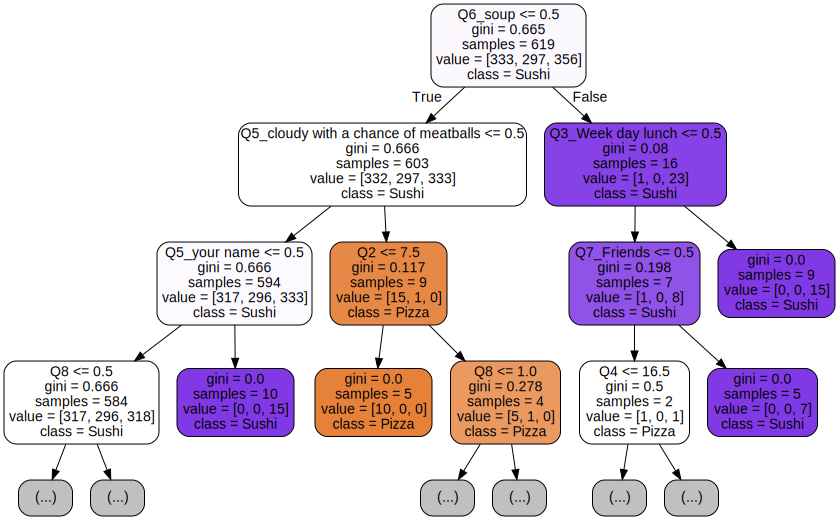


Tree #2:


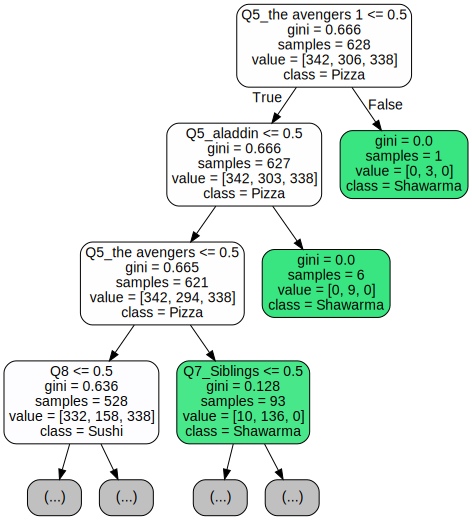


Tree #3:


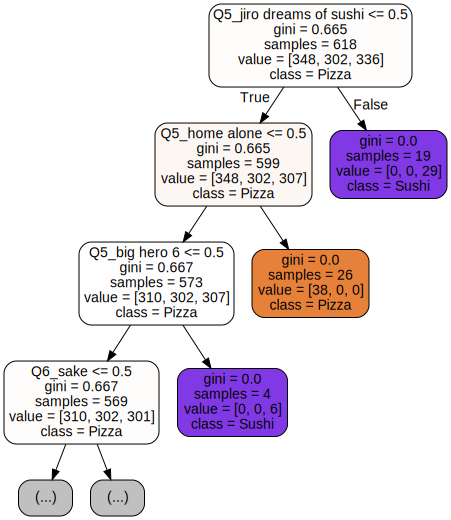

In [12]:
visualize_forest(clf, num_trees_to_show=3, max_depth=3)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameters to tune
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["entropy", "gini"],
    "max_depth": [10, 20, 30, 50, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create Decision Tree Classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

# Train the model
grid_search.fit(X_train, t_train)

# Get the best hyperparameters
best_forest = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on validation set
y_pred = best_forest.predict(X_valid)
val_acc = accuracy_score(t_valid, y_pred)

# Print best hyperparameters and performance
print("\n Best Hyperparameters:", best_params)
print(" Validation Accuracy:", val_acc)
print("\n Classification Report:\n", classification_report(t_valid, y_pred))

Fitting 5 folds for each of 360 candidates, totalling 1800 fits

 Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
 Validation Accuracy: 0.8753799392097265

 Classification Report:
               precision    recall  f1-score   support

       Pizza       0.88      0.92      0.90       114
    Shawarma       0.92      0.87      0.89       117
       Sushi       0.83      0.83      0.83        98

    accuracy                           0.88       329
   macro avg       0.87      0.87      0.87       329
weighted avg       0.88      0.88      0.88       329



In [14]:
best_forest = RandomForestClassifier(criterion='gini', max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
best_forest.fit(X_train, t_train)
print(best_forest.score(X_test, t_test))

0.8905775075987842


# **------------------------------------------------------------ **

## Part 1.5. Exploring Data



We can also visualize the spread of numerical features using *box plots*. A box plot visually summarizes much of the information that is produced by a call to data.describe(). The orange line in the middle of each box represents the median (or 50th percentile) of the data.  Each box spans a range from the 25th to 75th percentile of the attribute in question. Outliers are plotted as points outside of the box.

{'whiskers': [<matplotlib.lines.Line2D at 0x7a429c23c1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a429c23fd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a429c23c610>],
 'medians': [<matplotlib.lines.Line2D at 0x7a429c1bf2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a429c1bdb90>],
 'means': []}

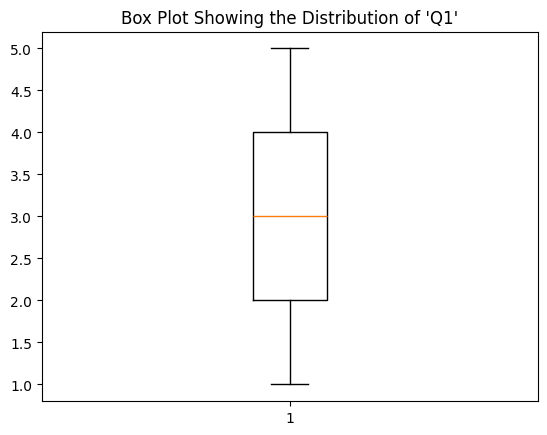

In [15]:
plt.title("Box Plot Showing the Distribution of 'Q1'")
plt.boxplot(data_fets["Q1"])

<ipython-input-16-606b6cb6a6d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  explore["Q2"].fillna(explore["Q2"].mean(), inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7a429c197850>,
 'caps': [<matplotlib.lines.Line2D at 0x7a429c0d9450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a429c1943d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a429c0d9490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a429c0da250>],
 'means': []}

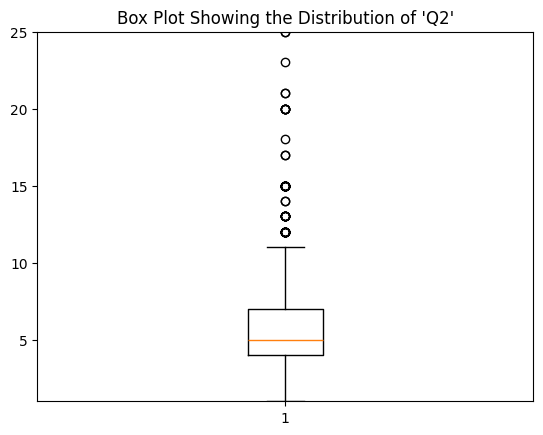

In [16]:
explore = data_fets.copy()
explore["Q2"].fillna(explore["Q2"].mean(), inplace=True)

plt.title("Box Plot Showing the Distribution of 'Q2'")
plt.ylim(1, 25)
plt.boxplot(explore["Q2"])

<ipython-input-17-5f27cbd2ff46>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  explore["Q4"].fillna(explore["Q4"].mean(), inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7a429c10b850>,
 'caps': [<matplotlib.lines.Line2D at 0x7a429c10aad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a429c17e450>],
 'medians': [<matplotlib.lines.Line2D at 0x7a429c0dd790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a429c0de6d0>],
 'means': []}

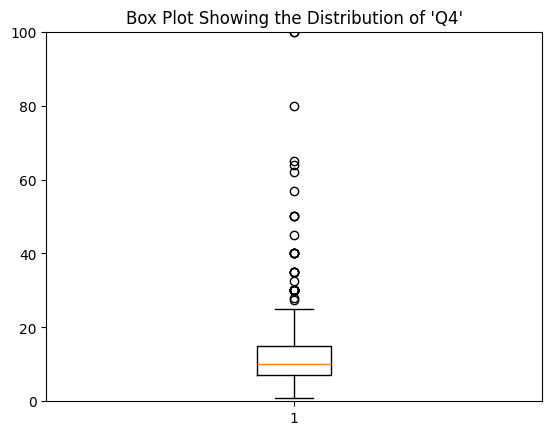

In [17]:
explore["Q4"].fillna(explore["Q4"].mean(), inplace=True)

plt.title("Box Plot Showing the Distribution of 'Q4'")
plt.ylim(0, 100)
plt.boxplot(explore["Q4"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a4297f92c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7a4297f9c4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a4297f92310>],
 'medians': [<matplotlib.lines.Line2D at 0x7a4297f9ddd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a4297f9e910>],
 'means': []}

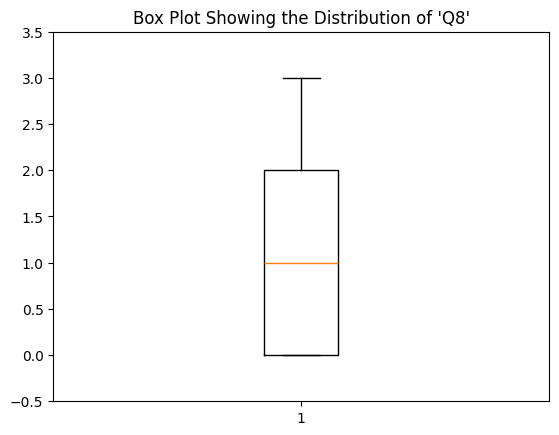

In [18]:
plt.title("Box Plot Showing the Distribution of 'Q8'")
plt.ylim(-0.5, 3.5)
plt.boxplot(data_fets["Q8"])

For the categorical features, we can also tabulate the frequency that each category occurs in the data set:

In [19]:
data_fets['Q1'].value_counts()

,count
Q1,
3,592
4,440
2,375
5,174
1,63


In [20]:
data['Q3: In what setting would you expect this food to be served? Please check all that apply'].value_counts()

,count
Q3: In what setting would you expect this food to be served? Please check all that apply,
"Week day lunch,Week day dinner,Weekend lunch,Weekend dinner,At a party,Late night snack",270
"Week day lunch,Week day dinner,Weekend lunch,Weekend dinner",201
"Week day lunch,Week day dinner,Weekend lunch,Weekend dinner,At a party",135
"Week day lunch,Weekend lunch",97
"Week day dinner,Weekend dinner",70
"Week day lunch,Week day dinner,Weekend lunch,Weekend dinner,Late night snack",69
Week day lunch,62
"Week day lunch,Weekend lunch,At a party",49
"Week day lunch,Weekend lunch,Late night snack",42


In [21]:
data['Q5: What movie do you think of when thinking of this food item?'].value_counts()

,count
Q5: What movie do you think of when thinking of this food item?,
the avengers,252
none,153
home alone,69
teenage mutant ninja turtles,68
spiderman,60
...,...
good time,1
who am i 2005,1
memory of a geisha,1


In [22]:
data['Q6: What drink would you pair with this food item?'].value_counts()

,count
Q6: What drink would you pair with this food item?,
coke,423
water,333
ice tea,134
soda,131
none,106
juice,72
sprite,53
diet pepsi,45
sake,44


In [23]:
data['Q7: When you think about this food item, who does it remind you of?'].value_counts()

,count
"Q7: When you think about this food item, who does it remind you of?",
Friends,435
"Parents,Siblings,Friends",176
"Friends,Strangers",162
"Siblings,Friends",136
Strangers,126
"Parents,Friends",111
"Parents,Siblings",89
Parents,71
"Friends,Teachers",57


Now, let's take a look at the distribution of our target variable. We can use these counts to further explore some correlations between the labels and various features.

In [24]:
data['Label'].value_counts()

,count
Label,
Pizza,548
Shawarma,548
Sushi,548


**Task**: Let's continue exploring our data by plotting separate box plots according to each characteristic.

<Axes: title={'center': 'Q8'}, xlabel='Label'>

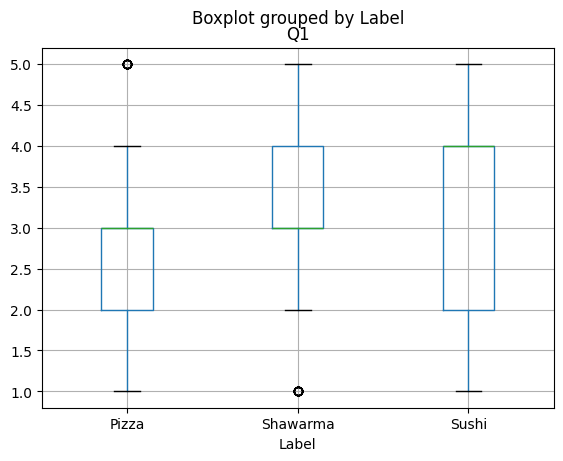

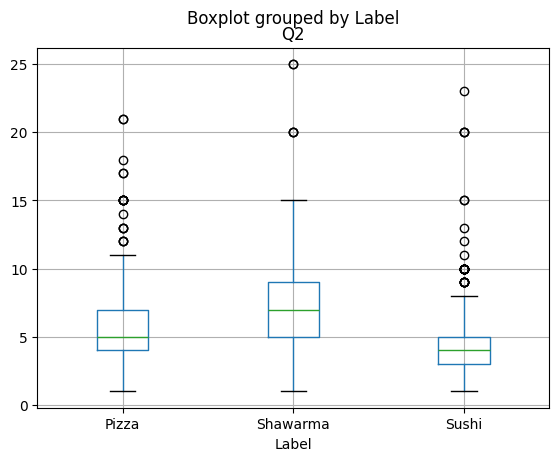

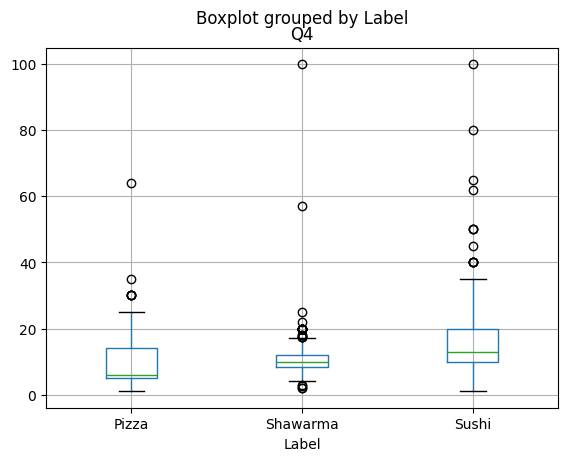

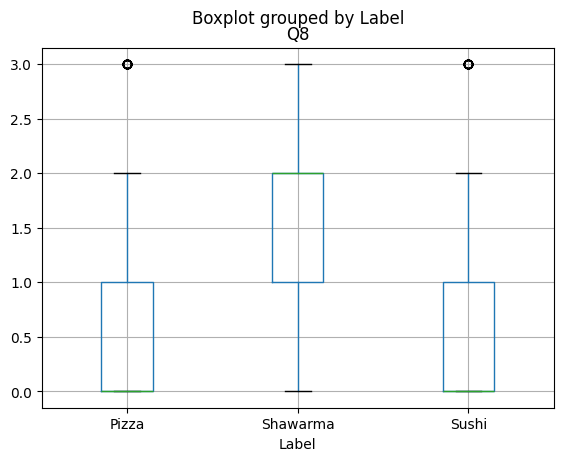

In [25]:
explore['Label'] = data['Label']

explore.boxplot(column='Q1', by='Label')

explore.boxplot(column='Q2', by='Label')

explore.boxplot(column='Q4', by='Label')

explore.boxplot(column='Q8', by='Label')

**Task**: We will do the same type of exploration for the categorical
variables. However, instead of box plots lets use bar graphs.

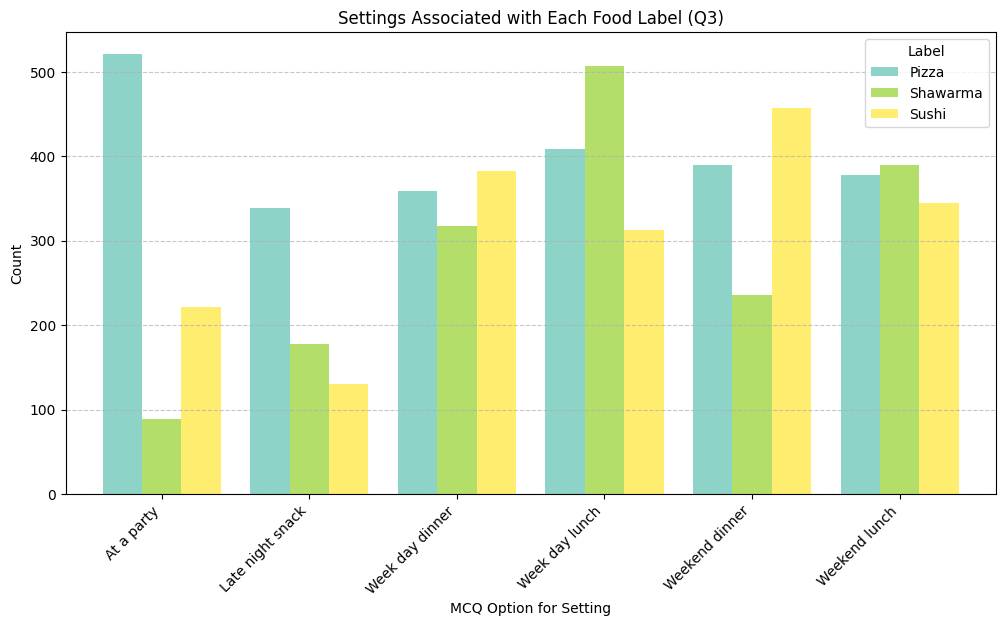

In [26]:
## previous display
# pd.crosstab(data["Label"], data["Q3: In what setting would you expect this food to be served? Please check all that apply"])

## new display
# isolate column 3
col_name = 'Q3: In what setting would you expect this food to be served? Please check all that apply'
q3_responses = data[[col_name, 'Label']].dropna()  # Drop NaNs

# split responses based on individual mcq options
expanded_data = q3_responses.assign(Setting=q3_responses[col_name].str.split(',')) \
                            .explode('Setting')  # Expand into separate rows

# get rid of spaces
expanded_data['Setting'] = expanded_data['Setting'].str.strip()

# count for each mcq answer based on the label
grouped_counts = expanded_data.groupby(['Setting', 'Label']).size().unstack(fill_value=0)

# plot side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))
grouped_counts.plot(kind='bar', ax=ax, colormap='Set3', width=0.8)  # width adjusts spacing

# set up graph settings
plt.xlabel('MCQ Option for Setting')
plt.ylabel('Count')
plt.title('Settings Associated with Each Food Label (Q3)')
plt.xticks(rotation=45, ha='right')  # Rotate for readability
plt.legend(title='Label')  # Show legend for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.show()

In [34]:
pd.crosstab(data["Label"], data["Q5: What movie do you think of when thinking of this food item?"])


Q5: What movie do you think of when thinking of this food item?,1001 nights,11sep,13 hours,2012,21 jump street,3 idiots,30 minutes or less,47 ronin,7 samurai,9,...,wizards of waverly place movie,wolf of wall street,wolf of wallstreet,wolverine,yakuza,yeh jawaani hai deewani,you dont mess with the zohan,your name,your name 2016,zootopia
Label,,,,,,,,,,,,,,,,,,,,,
Pizza,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2
Shawarma,1,1,1,1,1,3,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
Sushi,0,0,0,0,1,0,0,2,1,1,...,0,1,1,8,1,0,0,16,1,0


In [28]:
pd.crosstab(data["Label"], data["Q6: What drink would you pair with this food item?"])

Q6: What drink would you pair with this food item?,7up,any tea,ayran,baijiu,barbican,barley tea,boba,calpis,canada dry,carbonated drink,...,soda,soft drink,soup,soy sauce,sprindrift,sprite,the avengers,water,yakult,yogurt
Label,,,,,,,,,,,,,,,,,,,,,
Pizza,2,0,0,0,0,0,1,0,2,0,...,85,8,1,0,1,22,0,31,0,0
Shawarma,1,0,11,0,4,0,0,0,0,2,...,45,9,0,0,0,29,1,123,0,2
Sushi,0,1,0,1,0,6,5,3,0,0,...,1,4,31,1,0,2,0,179,1,0


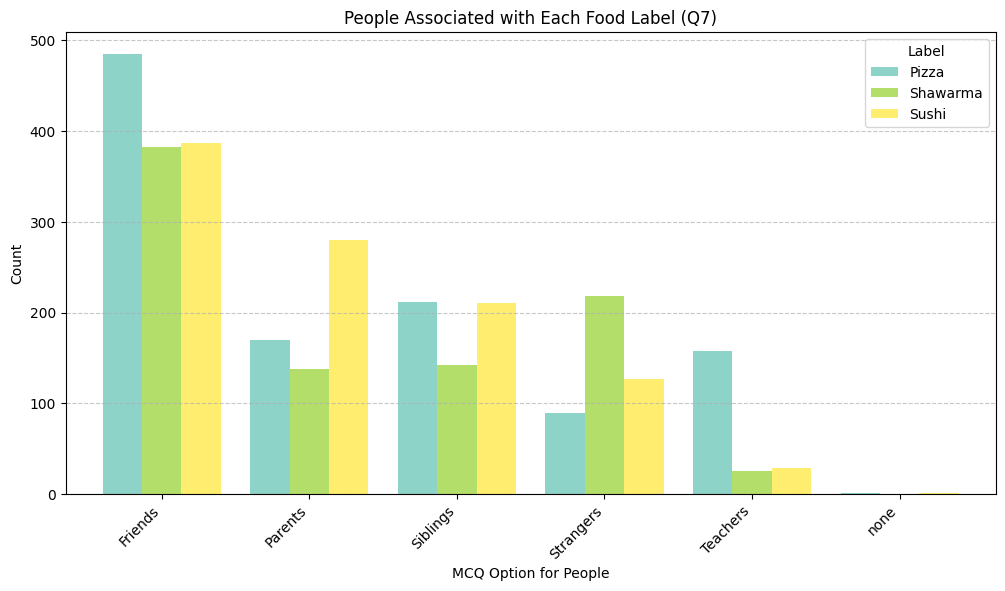

In [29]:
# pd.crosstab(data["Label"], data["Q7: When you think about this food item, who does it remind you of?"])

## new display
# isolate column 7
col_name = 'Q7: When you think about this food item, who does it remind you of?'
q7_responses = data[[col_name, 'Label']].dropna()  # Drop NaNs

# split responses based on individual mcq options
expanded_data = q7_responses.assign(Setting=q7_responses[col_name].str.split(',')) \
                            .explode('Setting')  # Expand into separate rows

# get rid of spaces
expanded_data['Setting'] = expanded_data['Setting'].str.strip()

# count for each mcq answer based on the label
grouped_counts = expanded_data.groupby(['Setting', 'Label']).size().unstack(fill_value=0)

# plot side-by-side bars
fig, ax = plt.subplots(figsize=(12, 6))
grouped_counts.plot(kind='bar', ax=ax, colormap='Set3', width=0.8)  # width adjusts spacing

# set up graph settings
plt.xlabel('MCQ Option for People')
plt.ylabel('Count')
plt.title('People Associated with Each Food Label (Q7)')
plt.xticks(rotation=45, ha='right')  # Rotate for readability
plt.legend(title='Label')  # Show legend for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show the plot
plt.show()